In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


# EXPLORATORY DATA ANALYSIS (EDA)


*
In this section, we will explore our dataset thoroughly. We will follow all the necessary steps of Exploratory Data Analysis (EDA) to understand the data, uncover patterns, spot anomalies, and check assumptions with the help of summary statistics and graphical representitionsWe aimis to gain insightsoll guide our further analysis and modeling effor.*s.


In [24]:
df = pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
# We will drop id col as we don't need this, this will make the dimensions of our dataset 150 x 5 col
df = df.drop('Id', axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.describe(include='object')

,Species
count,150
unique,3
top,Iris-setosa
freq,50


In [30]:
df.isna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [31]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# DATA VISUALIZATION 


*In this section, we will visualize our dataset using various plots and charts. Data visualization helps in understanding the distribution, relationships, and patterns within the data. By creating visual representations, we can quickly and effectively communicate findings and insights. We will use libraries such as Matplotlib, Seaborn, and Plotly to create these visualizations*







In [32]:
Iris_count = df['Species'].value_counts()
Iris_count

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

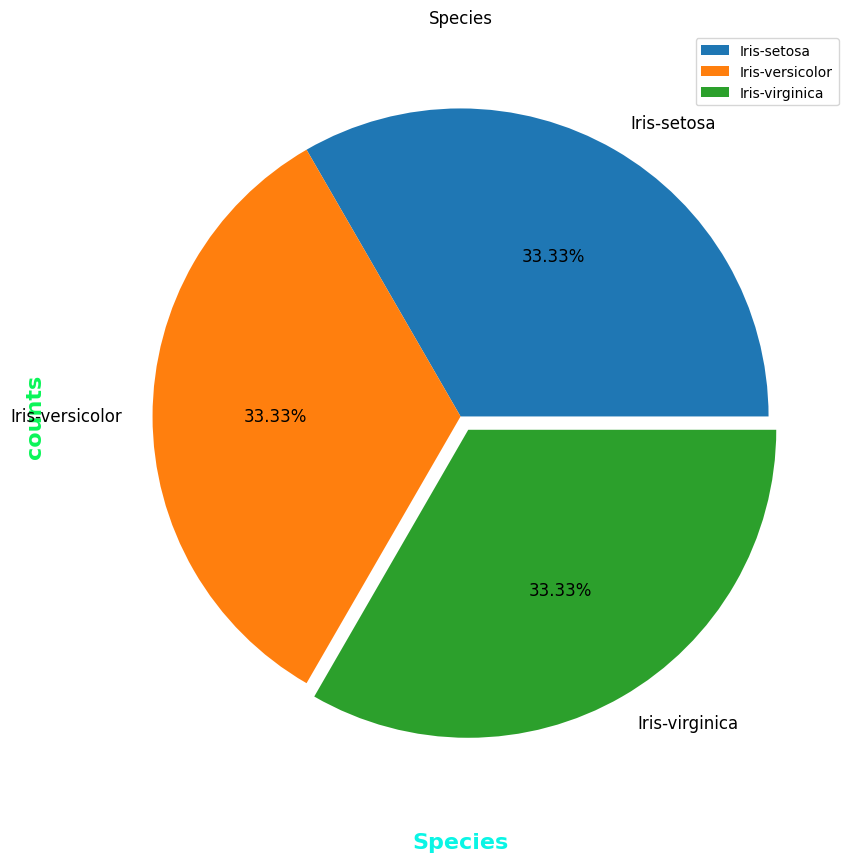

In [41]:
plt.figure(figsize = (20,10))
explode = (0,0,0.05)
Iris_count.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.2f%%')
plt.title('Species')
plt.xlabel('Species', weight = "bold", color = "#0af5e5", fontsize = 16, labelpad = 22)
plt.ylabel('counts', weight = "bold", color = "#0af558", fontsize = 16, labelpad = 22)
plt.legend(labels = Iris_count.index, loc = "best")
plt.show()

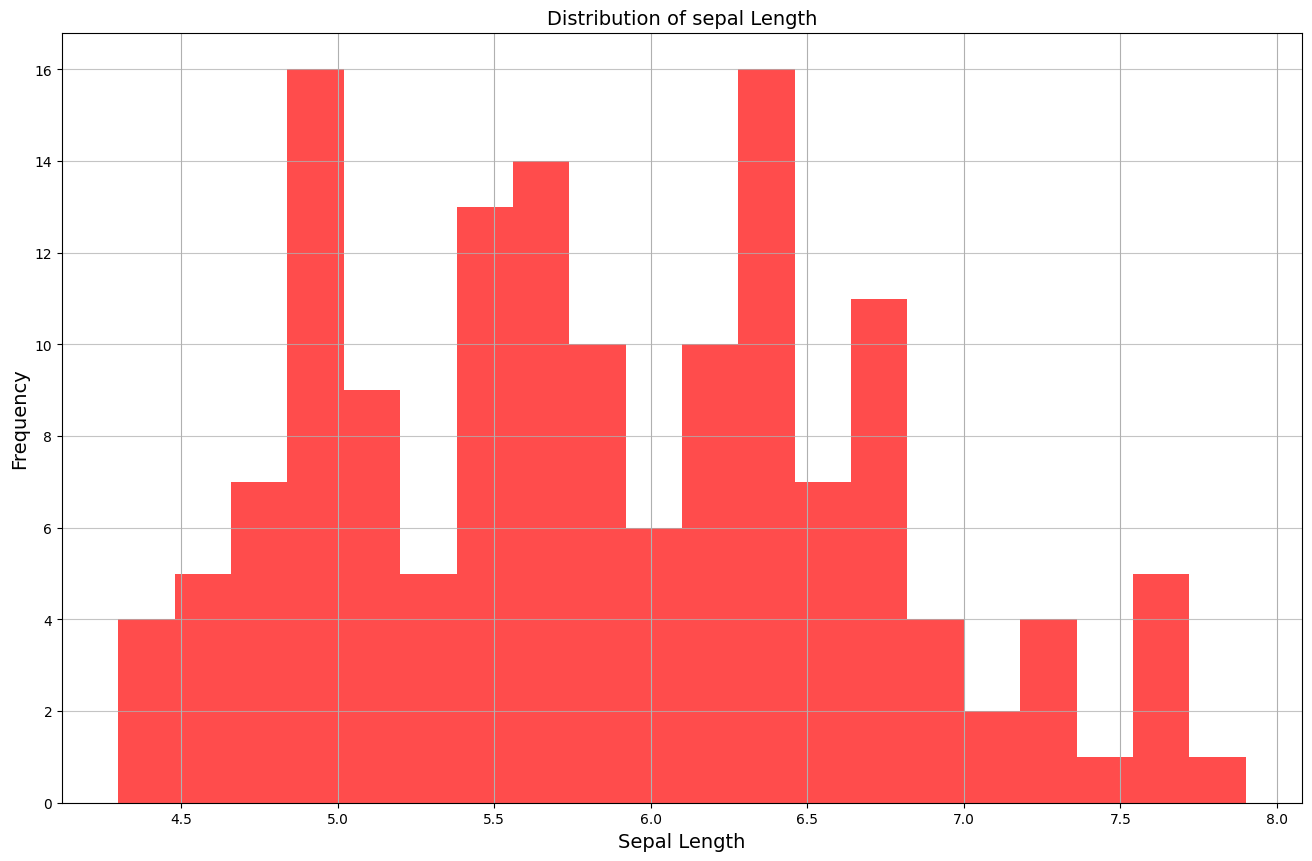

In [109]:
df['SepalLengthCm'].hist(bins = 20, color='red', alpha=0.7, figsize = (16,10))
plt.title('Distribution of sepal Length', fontsize=14)
plt.xlabel('Sepal Length', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.grid(axis = 'y', alpha=0.75)
plt.show()

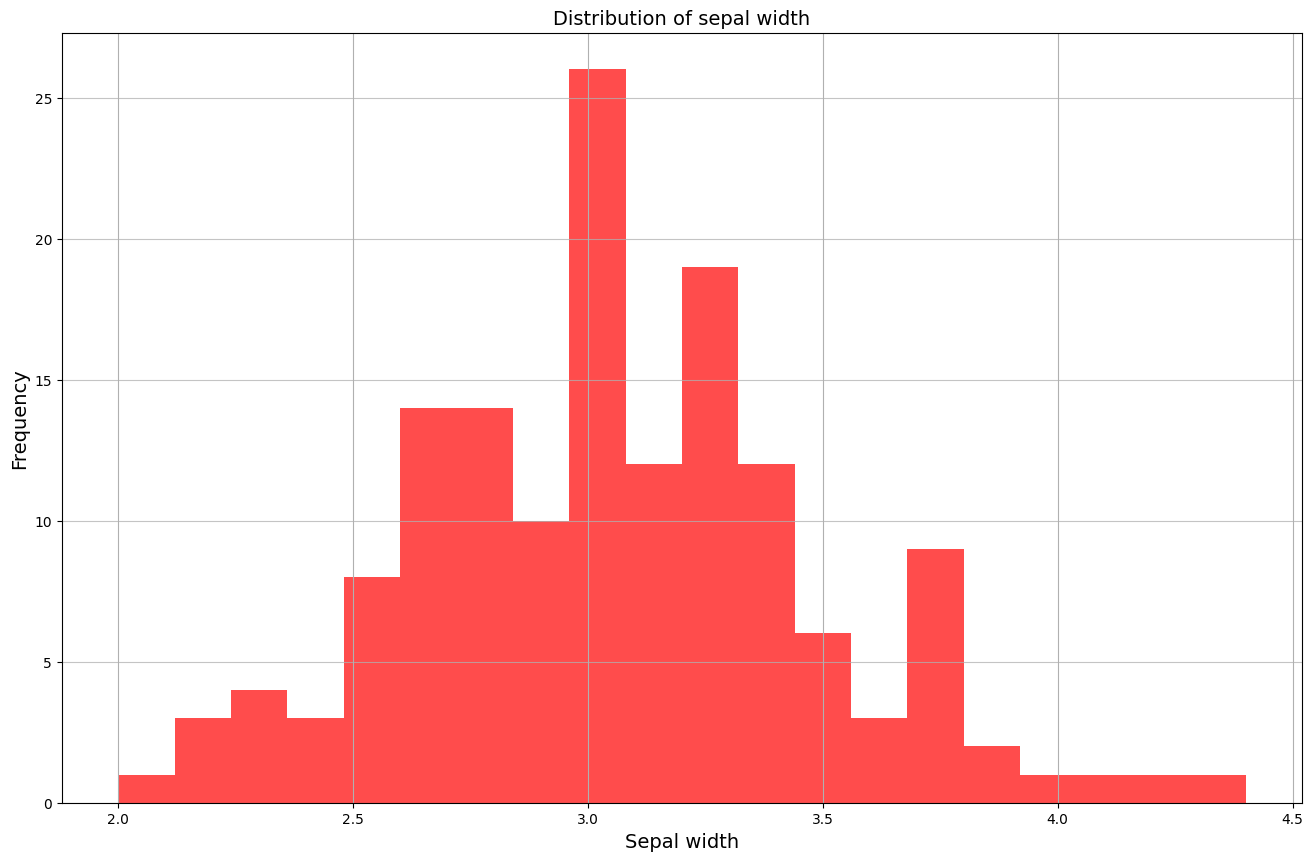

In [110]:
df['SepalWidthCm'].hist(bins = 20, color='red', alpha=0.7, figsize = (16,10))
plt.title('Distribution of sepal width', fontsize=14)
plt.xlabel('Sepal width', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.grid(axis = 'y', alpha=0.75)
plt.show()

C:\Users\Bluem\AppData\Local\Temp\ipykernel_15176\1113634701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='Species', y='SepalLengthCm', data=df, palette='viridis')


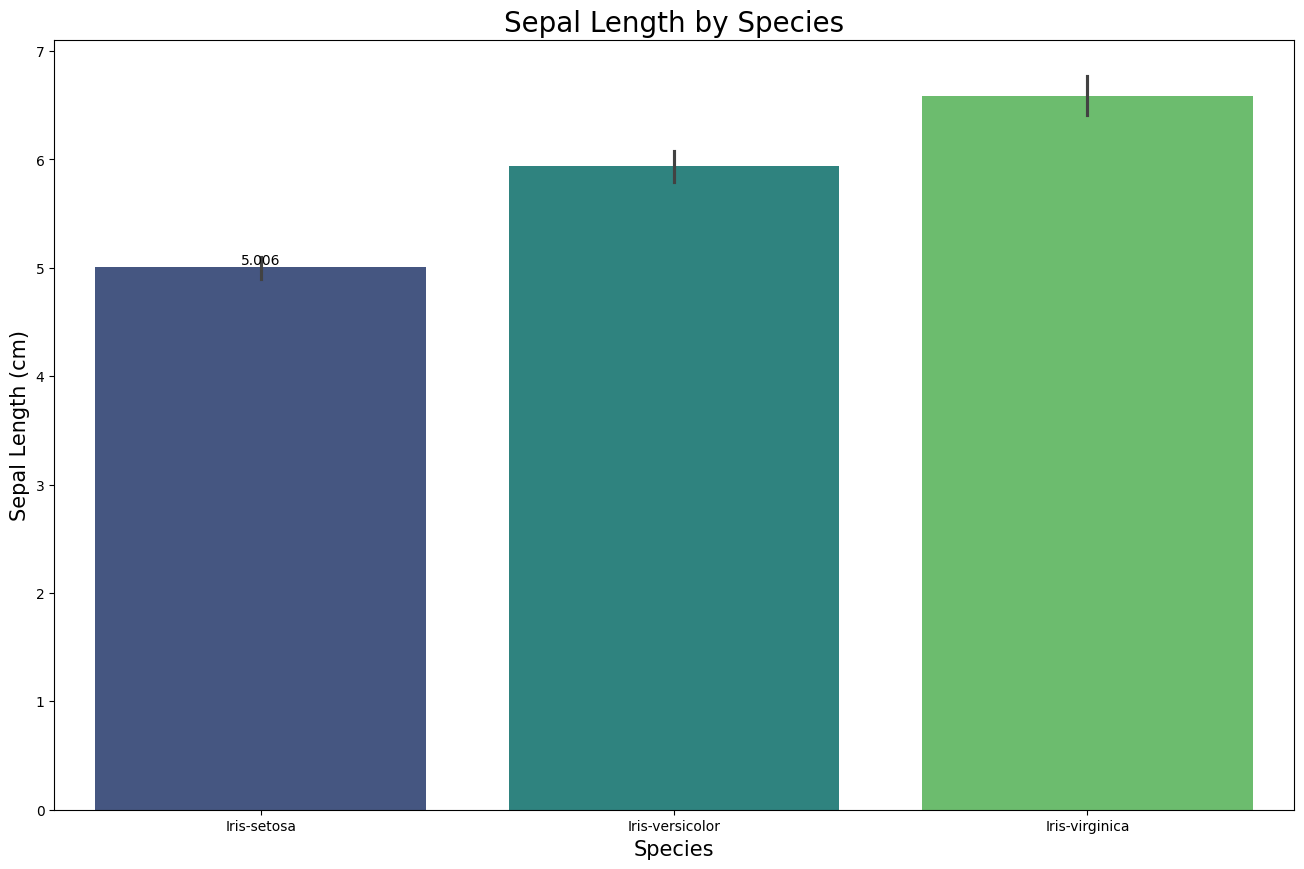

In [57]:
plt.figure(figsize=(16, 10))
ax = sb.barplot(x='Species', y='SepalLengthCm', data=df, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sepal Length by Species', fontsize=20)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Sepal Length (cm)', fontsize=15)
plt.show()

C:\Users\Bluem\AppData\Local\Temp\ipykernel_15176\1300096307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='Species', y='SepalWidthCm', data=df, palette='viridis')


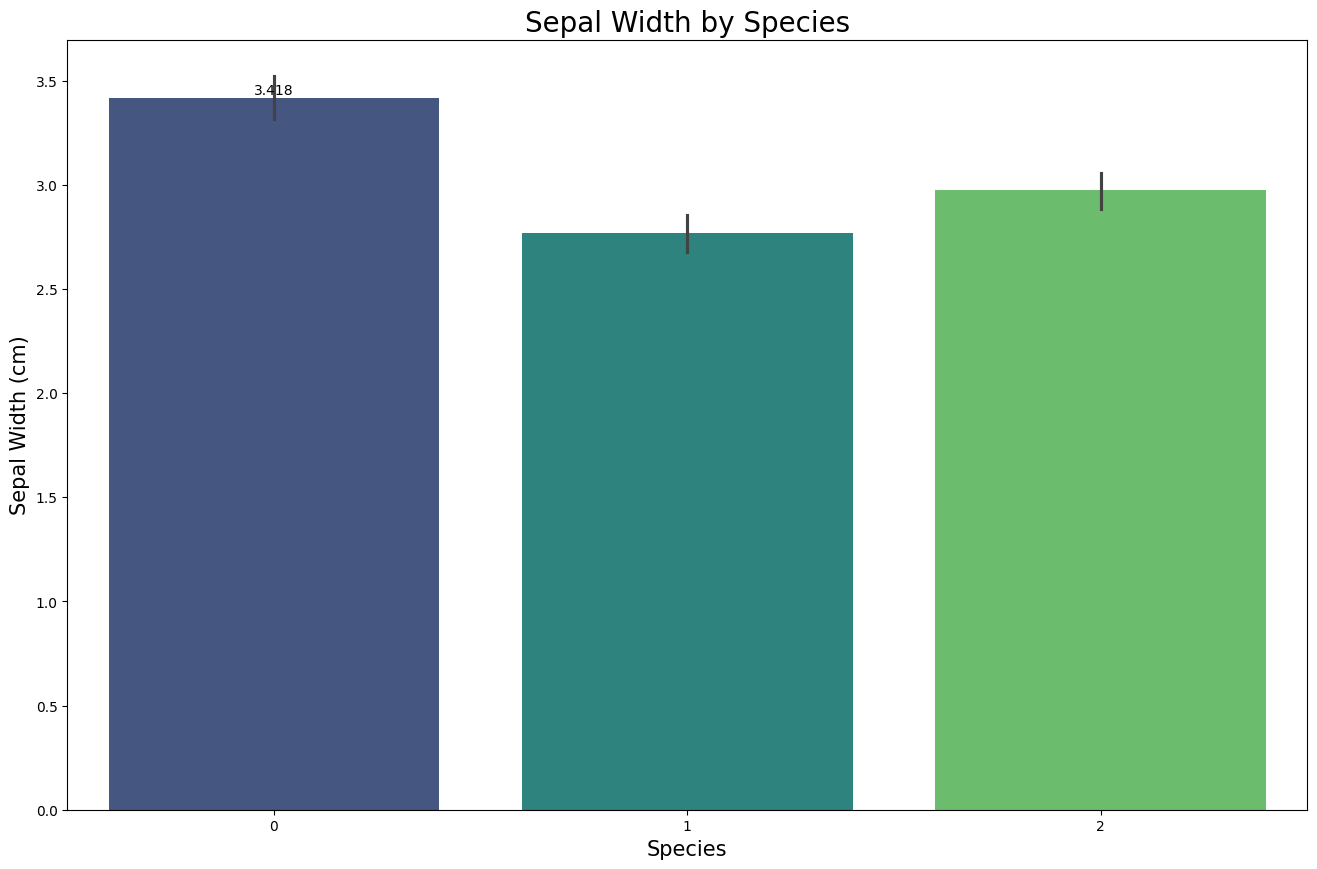

In [111]:
plt.figure(figsize=(16, 10))
ax = sb.barplot(x='Species', y='SepalWidthCm', data=df, palette='viridis')

# Adding labels to the bars
ax.bar_label(ax.containers[0], fontsize=10)

# Customizing the title and labels
plt.title('Sepal Width by Species', fontsize=20)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Sepal Width (cm)', fontsize=15)

# Display the plot
plt.show()

C:\Users\Bluem\AppData\Local\Temp\ipykernel_15176\1113634701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='Species', y='SepalLengthCm', data=df, palette='viridis')


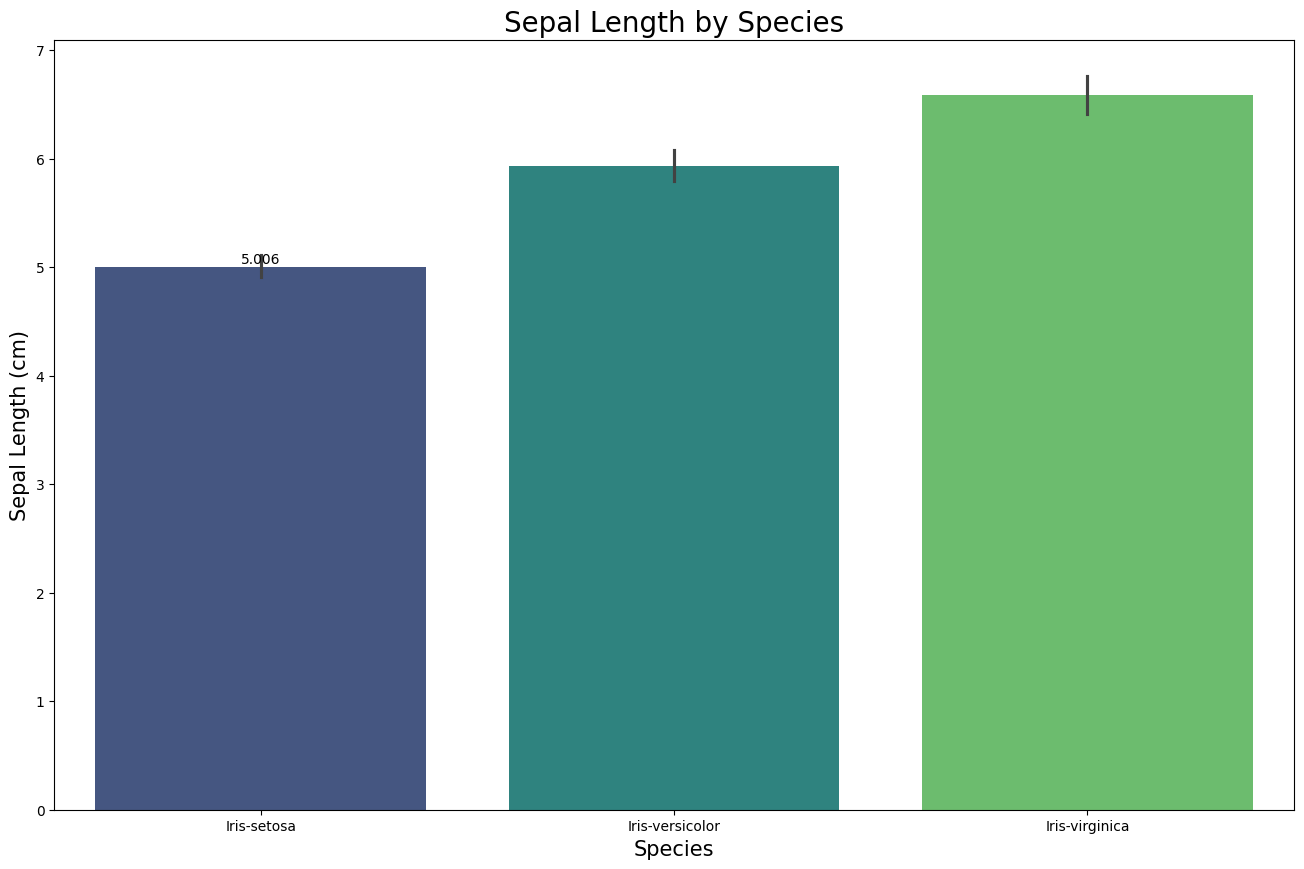

In [64]:
plt.figure(figsize=(16, 10))
ax = sb.barplot(x='Species', y='SepalLengthCm', data=df, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Sepal Length by Species', fontsize=20)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Sepal Length (cm)', fontsize=15)
plt.show()

C:\Users\Bluem\AppData\Local\Temp\ipykernel_15176\1325350504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='Species', y='PetalWidthCm', data=df, palette='viridis')


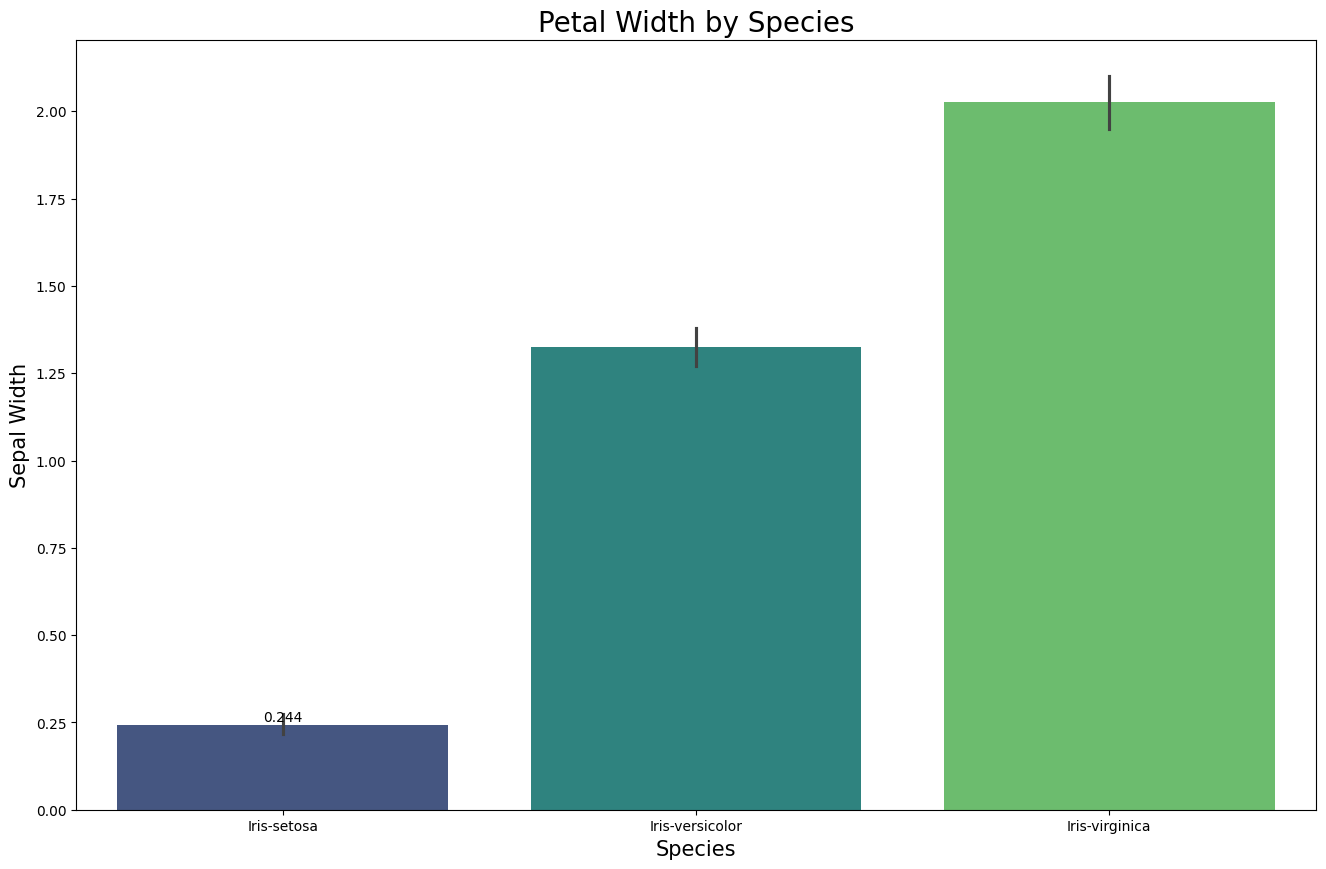

In [65]:
plt.figure(figsize=(16, 10))
ax = sb.barplot(x='Species', y='PetalWidthCm', data=df, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Petal Width by Species', fontsize=20)
plt.xlabel('Species', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
plt.show()

# ENCODING DATA


In [68]:
encoded_data = LabelEncoder()
df['Species'] = encoded_data.fit_transform(df['Species'])

In [69]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [70]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# CORRELATION OF DATA

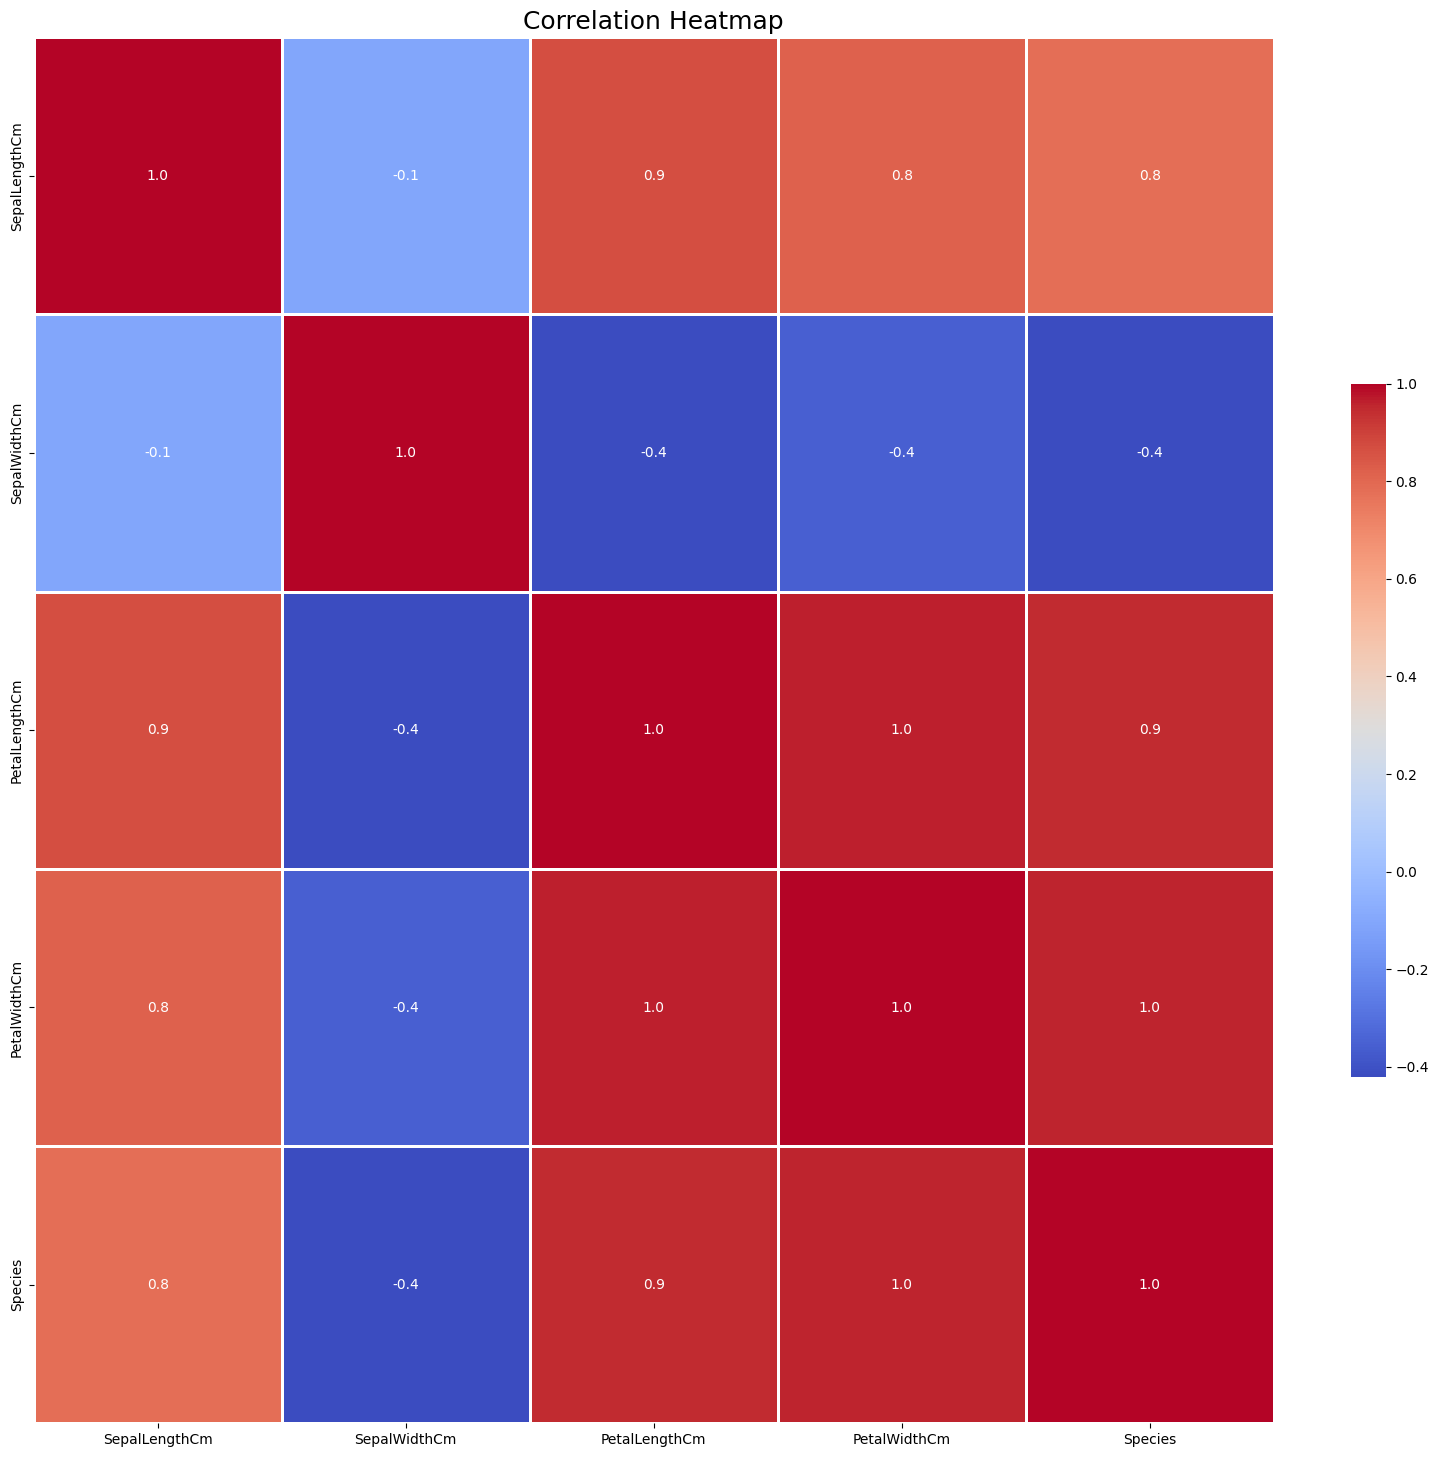

In [78]:
# Assuming df is your dataframe
plt.figure(figsize=(20,18))  
sb.heatmap(df.corr(), annot=True, 
           fmt=".1f",  
           linewidths=1,  
           cmap='coolwarm',  
           cbar_kws={'shrink': 0.5})  
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

# FEATURE ENGINEERING

In [79]:
x = df.drop(columns = ['Species'])
y=df['Species']

In [86]:
y = y.reshape(-1,1)

In [87]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

# SCALLING & SPLITTING DATASET


In [90]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [92]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [95]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
Dt.score(X_train, y_train)

1.0

In [99]:
y_pred = Dt.predict(X_test)

In [101]:
print(accuracy_score(y_test, y_pred))

1.0


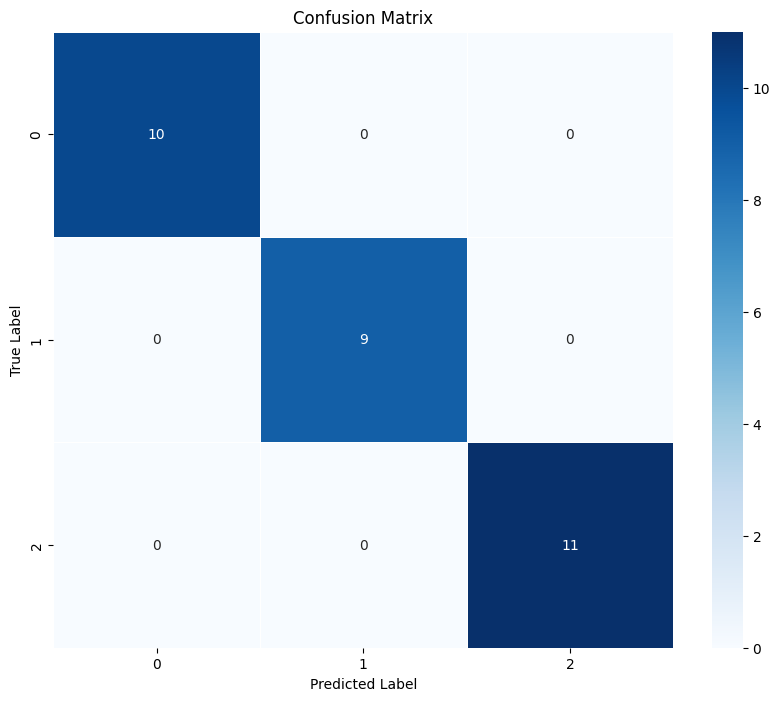

In [105]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

